# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   cp           303 non-null    float64
 3   trestbps     303 non-null    float64
 4   chol         303 non-null    float64
 5   fbs          303 non-null    float64
 6   restecg      303 non-null    float64
 7   thalach      303 non-null    float64
 8   exang        303 non-null    float64
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    float64
 11  ca           303 non-null    object 
 12  thal         303 non-null    object 
 13  num          303 non-null    int64  
 14  flag_doente  303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


1. Crie um script que monta a análise bivariada e transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [4]:
# A função que calcula as estatísticas bivariadas

def calcular_estatisticas_bivariada(df: pd.DataFrame, var: str, target: str) -> pd.DataFrame:
    # Cria um dataframe com contagens de doentes e saudáveis por categoria da variável
    bivariate_df = df.groupby(var).agg({target:['sum', 'count']})
    bivariate_df.columns = ['doentes', 'total']
    
    # Calcula o número de saudáveis por categoria da variável
    bivariate_df['saudaveis'] = bivariate_df['total'] - bivariate_df['doentes']
    
    # Calcula a quantidade média de doentes
    bivariate_df['quantidade_media_doentes'] = df[target].mean()
    
    # Calcula os odds
    bivariate_df['odds'] = bivariate_df['doentes'] / bivariate_df['saudaveis']
    
    # Calcula odds ratio usando o total como referência
    total_odds = df[target].sum() / (len(df) - df[target].sum())
    bivariate_df['odds_ratio'] = bivariate_df['odds'] / total_odds
    
    # Calcula Logito (LOG(odds))
    bivariate_df['logito'] = np.log(bivariate_df['odds'])
    
    # Calcula Weight of Evidence (WOE) = LOG(odds ratio)
    bivariate_df['WOE'] = np.log(bivariate_df['odds_ratio'])
    
    # Como solicitado, retorna um dataframe com as estatísticas calculadas
    return bivariate_df

In [5]:
df_sex = calcular_estatisticas_bivariada(df, 'sex', 'flag_doente')
df_sex

,doentes,total,saudaveis,quantidade_media_doentes,odds,odds_ratio,logito,WOE
sex,,,,,,,,
0.0,25,97,72,0.458746,0.347222,0.409672,-1.05779,-0.892398
1.0,114,206,92,0.458746,1.239130,1.461996,0.21441,0.379802


In [6]:
df_cp = calcular_estatisticas_bivariada(df, 'cp', 'flag_doente')
df_cp

,doentes,total,saudaveis,quantidade_media_doentes,odds,odds_ratio,logito,WOE
cp,,,,,,,,
1.0,7,23,16,0.458746,0.437500,0.516187,-0.826679,-0.661286
2.0,9,50,41,0.458746,0.219512,0.258993,-1.516347,-1.350955
3.0,18,86,68,0.458746,0.264706,0.312315,-1.329136,-1.163743
4.0,105,144,39,0.458746,2.692308,3.176536,0.990399,1.155791


In [7]:
df_restecg = calcular_estatisticas_bivariada(df, 'restecg', 'flag_doente')
df_restecg

,doentes,total,saudaveis,quantidade_media_doentes,odds,odds_ratio,logito,WOE
restecg,,,,,,,,
0.0,56,151,95,0.458746,0.589474,0.695494,-0.528525,-0.363133
1.0,3,4,1,0.458746,3.000000,3.539568,1.098612,1.264005
2.0,80,148,68,0.458746,1.176471,1.388066,0.162519,0.327911


2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [8]:
def calcular_estatisticas_bivariada_continua(df: pd.DataFrame, var: float, target: str, n_categories: int = 5) -> pd.DataFrame:
    # Cria um dataframe com contagens de doentes e saudáveis por categoria da variável
    bivariate_df = df.groupby(pd.qcut(df[var], q=n_categories, duplicates='drop')).agg({target:['sum', 'count']})
    bivariate_df.columns = ['doentes', 'total']
    
    # Calcula o número de saudáveis por categoria da variável
    bivariate_df['saudaveis'] = bivariate_df['total'] - bivariate_df['doentes']
    
    # Calcula a quantidade média de doentes
    bivariate_df['quantidade_media_doentes'] = df[target].mean()
    
    # Calcula os odds
    bivariate_df['odds'] = bivariate_df['doentes'] / bivariate_df['saudaveis']
    
    # Calcula odds ratio usando o total como referência
    total_odds = df[target].sum() / (len(df) - df[target].sum())
    bivariate_df['odds_ratio'] = bivariate_df['odds'] / total_odds
    
    # Calcula Logito (LOG(odds))
    bivariate_df['logito'] = np.log(bivariate_df['odds'])
    
    return bivariate_df

In [9]:
df_age = calcular_estatisticas_bivariada_continua(df, 'age', 'flag_doente')
df_age

,doentes,total,saudaveis,quantidade_media_doentes,odds,odds_ratio,logito
age,,,,,,,
"(28.999, 45.0]",16,63,47,0.458746,0.340426,0.401653,-1.077559
"(45.0, 53.0]",22,64,42,0.458746,0.523810,0.618020,-0.646627
"(53.0, 58.0]",39,71,32,0.458746,1.218750,1.437950,0.197826
"(58.0, 62.0]",32,45,13,0.458746,2.461538,2.904261,0.900787
"(62.0, 77.0]",30,60,30,0.458746,1.000000,1.179856,0.000000


In [10]:
df_chol = calcular_estatisticas_bivariada_continua(df, 'chol', 'flag_doente')
df_chol

,doentes,total,saudaveis,quantidade_media_doentes,odds,odds_ratio,logito
chol,,,,,,,
"(125.999, 204.0]",25,62,37,0.458746,0.675676,0.797200,-0.392042
"(204.0, 230.0]",24,60,36,0.458746,0.666667,0.786571,-0.405465
"(230.0, 254.0]",26,62,36,0.458746,0.722222,0.852118,-0.325422
"(254.0, 286.0]",32,59,27,0.458746,1.185185,1.398348,0.169899
"(286.0, 564.0]",32,60,28,0.458746,1.142857,1.348407,0.133531


In [11]:
df_trestbps = calcular_estatisticas_bivariada_continua(df, 'trestbps', 'flag_doente')
df_trestbps

,doentes,total,saudaveis,quantidade_media_doentes,odds,odds_ratio,logito
trestbps,,,,,,,
"(93.999, 120.0]",37,97,60,0.458746,0.616667,0.727578,-0.483427
"(120.0, 126.0]",15,25,10,0.458746,1.500000,1.769784,0.405465
"(126.0, 134.0]",27,62,35,0.458746,0.771429,0.910175,-0.259511
"(134.0, 144.6]",24,58,34,0.458746,0.705882,0.832840,-0.348307
"(144.6, 200.0]",36,61,25,0.458746,1.440000,1.698993,0.364643


3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

In [12]:
reglog = smf.logit("flag_doente ~ C(sex) + C(cp) + trestbps + age"
                   , data=df).fit()

print(reglog.summary())

Optimization terminated successfully.
         Current function value: 0.476154
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            6
Date:                Mon, 20 Nov 2023   Pseudo R-squ.:                  0.3097
Time:                        16:42:42   Log-Likelihood:                -144.27
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.692e-25
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -8.3407      1.621     -5.145      0.000     -11.518      -5.163
C(sex)[T.1.0]     1.

In [13]:
df['predito'] = reglog.predict(df)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,predito
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,0.458229
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,0.944123
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,0.886566
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,0.134929
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,0.027278


4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

In [14]:
# Verificando a calibragem do modelo
cat_pred = pd.qcut(df['predito'], 5, duplicates='drop')
cat_pred.value_counts().sort_index()

(0.0131, 0.143]    62
(0.143, 0.287]     59
(0.287, 0.586]     62
(0.586, 0.822]     59
(0.822, 0.944]     61
Name: predito, dtype: int64

In [15]:
group_reg = df.groupby(cat_pred)
qualid = group_reg[['flag_doente']].count().rename(columns = {'flag_doente': 'contagem'})
qualid

,contagem
predito,
"(0.0131, 0.143]",62
"(0.143, 0.287]",59
"(0.287, 0.586]",62
"(0.586, 0.822]",59
"(0.822, 0.944]",61


In [16]:
qualid['predito'] = group_reg['predito'].mean()
qualid

,contagem,predito
predito,,
"(0.0131, 0.143]",62,0.072008
"(0.143, 0.287]",59,0.209626
"(0.287, 0.586]",62,0.435175
"(0.586, 0.822]",59,0.708861
"(0.822, 0.944]",61,0.874819


In [17]:
qualid['pct_doente'] = group_reg['flag_doente'].mean()
qualid

,contagem,predito,pct_doente
predito,,,
"(0.0131, 0.143]",62,0.072008,0.080645
"(0.143, 0.287]",59,0.209626,0.152542
"(0.287, 0.586]",62,0.435175,0.483871
"(0.586, 0.822]",59,0.708861,0.762712
"(0.822, 0.944]",61,0.874819,0.819672


Text(0.5, 0, 'Grupo')

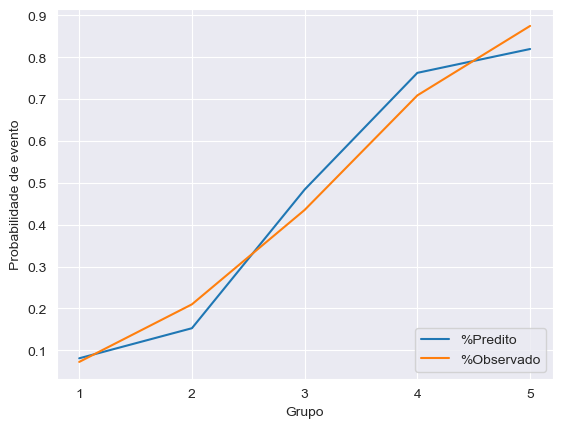

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = qualid['pct_doente'].plot(label='%Predito')
ax = qualid['predito'].plot(label='%Observado')

ticks = ax.set_xticks([0, 1, 2, 3, 4])
labels = ax.set_xticklabels([1, 2, 3, 4, 5])
ax.legend(loc="lower right")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo')

5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

In [19]:
from sklearn import metrics
from scipy.stats import ks_2samp

acc = metrics.accuracy_score(df['flag_doente'], df['predito']>.5)
print('Acurácia: {0:.2f}%'.format(acc*100))

#AUC
fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])
auc_ = metrics.auc(fpr, tpr)
#Gini
gini = 2*auc_ -1
#KS
ks = ks_2samp(df.loc[df['flag_doente'] == 1, 'predito'], df.loc[df['flag_doente'] != 1, 'predito']).statistic

print('KS: {0:.2f}% \nAUC: {1:.2f}% \nGINI: {2:.2f}%'
      .format(ks*100, auc_*100, gini*100))

Acurácia: 79.54%
KS: 59.30% 
AUC: 85.19% 
GINI: 70.39%


6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

In [30]:
# excluir as linhas com ? da variável ca e thal
df = df[df.ca != '?']
df = df[df.thal != '?']


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          297 non-null    float64
 1   sex          297 non-null    float64
 2   cp           297 non-null    float64
 3   trestbps     297 non-null    float64
 4   chol         297 non-null    float64
 5   fbs          297 non-null    float64
 6   restecg      297 non-null    float64
 7   thalach      297 non-null    float64
 8   exang        297 non-null    float64
 9   oldpeak      297 non-null    float64
 10  slope        297 non-null    float64
 11  ca           297 non-null    object 
 12  thal         297 non-null    object 
 13  num          297 non-null    int64  
 14  flag_doente  297 non-null    int64  
 15  predito      297 non-null    float64
dtypes: float64(12), int64(2), object(2)
memory usage: 39.4+ KB


In [34]:
reglog = smf.logit("flag_doente ~ age + C(sex) + C(cp) + trestbps + chol + thalach + C(exang) + oldpeak + C(slope) + C(ca) + C(thal)"
                   , data=df).fit()

print(reglog.summary())


'''
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica) 
'''

Optimization terminated successfully.
         Current function value: 0.312610
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            flag_doente   No. Observations:                  297
Model:                          Logit   Df Residuals:                      279
Method:                           MLE   Df Model:                           17
Date:                Mon, 20 Nov 2023   Pseudo R-squ.:                  0.5470
Time:                        17:03:44   Log-Likelihood:                -92.845
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 3.621e-38
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -6.2021      2.937     -2.111      0.035     -11.959      -0.445
C(sex)[T.1.0] 

'\n- age: idade do paciente em anos\n- sex: sexo (1 = male; 0 = female)  \n- cp: tipo de dor no peito\n  - 1: angina típica\n  - 2: angina atípica\n  - 3: dor não-angina\n  - 4: assintomático\n- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital\n- chol: colesterol sérico em mg/dl\n- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)\n- restecg: resultados eletrocardiográficos em repouso\n  - 0: normal\n  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)\n  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes\n- thalach: frequência cardíaca máxima alcançada\n- exang: angina induzida por exercício(1 = sim; 0 = não)\n- oldpeak = Depressão de ST induzida por exercício em relação ao repouso\n- slope: Depressão de ST induzida por exercício em relação ao repouso\n  - 1: inclinação ascendente\n  - 2: estável\n  - 3: inclinação descendente\n- ca: número de 

Text(0.5, 0, 'Grupo')

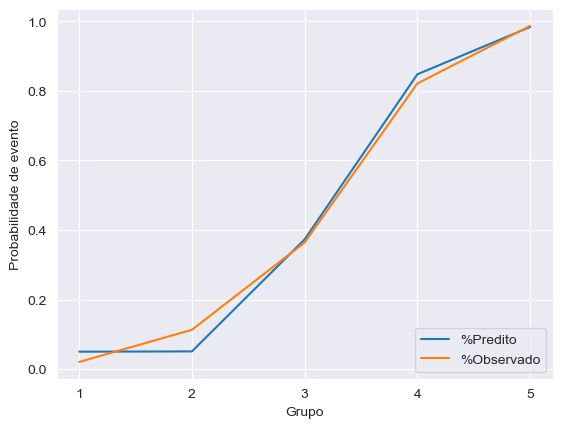

In [35]:
df['predito2'] = reglog.predict(df)

# Verificando a calibragem do modelo
cat_pred = pd.qcut(df['predito2'], 5, duplicates='drop')
cat_pred.value_counts().sort_index()
group_reg = df.groupby(cat_pred)
qualid = group_reg[['flag_doente']].count().rename(columns = {'flag_doente': 'contagem'}) 
qualid['predito2'] = group_reg['predito2'].mean()
qualid['pct_doente'] = group_reg['flag_doente'].mean()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = qualid['pct_doente'].plot(label='%Predito')
ax = qualid['predito2'].plot(label='%Observado')

ticks = ax.set_xticks([0, 1, 2, 3, 4])
labels = ax.set_xticklabels([1, 2, 3, 4, 5])
ax.legend(loc="lower right")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo')

In [36]:
acc = metrics.accuracy_score(df['flag_doente'], df['predito2']>.5)
print('Acurácia: {0:.2f}%'.format(acc*100))

Acurácia: 89.23%


- Acrescentando mais variáveis ao modelo, a calibragem melhorou e a acurácia aumentou.